# Libraries

In [1]:
!pip install xgboost

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
!sudo pip install scikit-learn==0.24.2

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [129]:
import os
import pandas as pd
import numpy as np
import utils
pd.options.display.max_columns = 300

# Read Datasets

In [145]:
train = pd.read_csv(f'./food_train.tsv', index_col='Index', encoding='utf-8', sep='\t')
X_train = train.drop(columns = 'target')
y_train = train.target
del train
X_test = pd.read_csv(f'./food_X_test.tsv', index_col='Index', encoding='latin', sep='\t')
y_test_submission_example = pd.read_csv(f'./y_test_submission_example.tsv', index_col='Index', encoding='utf-8', sep='\t')

In [146]:
train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train')

********************train********************
shape  (102028, 57)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
created_t,102028.0,1.476434e+09,3.087528e+07,1.328972e+09,1.484814e+09,1.489068e+09,1.489133e+09,1.505689e+09,76700,0,0.00000
last_modified_t,102028.0,1.485816e+09,1.691168e+07,1.335372e+09,1.489054e+09,1.489076e+09,1.489143e+09,1.505693e+09,75648,0,0.00000
cities,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,102028,1.00000
allergens_en,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,102028,1.00000
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,102028,1.00000
additives_n,92220.0,1.916829e+00,2.526177e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,3.000000e+01,30,9808,0.09613
ingredients_from_palm_oil_n,92220.0,2.624160e-02,1.614065e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3,9808,0.09613
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,102028,1.00000
ingredients_that_may_be_from_palm_oil_n,92220.0,6.178703e-02,2.860150e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,6,9808,0.09613
ingredients_that_may_be_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,102028,1.00000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,102028,1765,usda-ndb-import,55400,0,0.000000
created_datetime,102028,76700,2017-03-09T10:37:09Z,12,0,0.000000
last_modified_datetime,102028,75648,2017-03-09T10:37:09Z,11,0,0.000000
product_name,100907,81855,Ice Cream,170,1121,0.010987
generic_name,17501,14610,Pâtes alimentaires au blé dur de qualité supér...,75,84527,0.828469
quantity,29824,5276,500 g,1458,72204,0.707688
packaging,25699,6588,"Sachet,Plastique",887,76329,0.748118
packaging_tags,25698,5459,"sachet,plastique",1705,76330,0.748128
brands,100080,27744,Carrefour,1211,1948,0.019093
brands_tags,100078,24683,carrefour,1227,1950,0.019112


In [132]:
test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test')

********************test********************
shape  (25508, 57)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
created_t,25508.0,1.475883e+09,3.107721e+07,1.329342e+09,1.480619e+09,1.489067e+09,1.489133e+09,1.505683e+09,23386,0,0.000000
last_modified_t,25508.0,1.485848e+09,1.674066e+07,1.341240e+09,1.489053e+09,1.489076e+09,1.489144e+09,1.505683e+09,23323,0,0.000000
cities,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,25508,1.000000
allergens_en,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,25508,1.000000
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,25508,1.000000
additives_n,23016.0,1.895116e+00,2.480975e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.700000e+01,25,2492,0.097695
ingredients_from_palm_oil_n,23016.0,2.845846e-02,1.693888e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3,2492,0.097695
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,25508,1.000000
ingredients_that_may_be_from_palm_oil_n,23016.0,6.612791e-02,3.013009e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,6,2492,0.097695
ingredients_that_may_be_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,25508,1.000000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,25508,806,usda-ndb-import,13483,0,0.000000
created_datetime,25508,23386,2017-03-09T10:45:47Z,5,0,0.000000
last_modified_datetime,25508,23323,2017-03-10T08:23:05Z,4,0,0.000000
product_name,25236,22577,Ice Cream,46,272,0.010663
generic_name,4558,4179,PÃ¢tes alimentaires au blÃ© dur de qualitÃ© su...,19,20950,0.821311
quantity,7842,1951,500 g,382,17666,0.692567
packaging,6736,2363,"Sachet,Plastique",232,18772,0.735926
packaging_tags,6736,1976,"sachet,plastique",435,18772,0.735926
brands,24999,11027,Carrefour,336,509,0.019955
brands_tags,24998,10245,carrefour,344,510,0.019994


# Data Cleaning

In [133]:
X_train.head(2)

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
104815,usda-ndb-import,1489135595,2017-03-10T08:46:35Z,1489135595,2017-03-10T08:46:35Z,Caramel Creams,NaN,NaN,NaN,NaN,Gold Emblem,gold-emblem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Wheat flour, corn syrup, dextrose, sugar, part...",NaN,NaN,NaN,NaN,NaN,34 g (3 PIECES),NaN,1.0,[ wheat-flour -> en:wheat-flour ] [ flour -...,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin",0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN
62513,usda-ndb-import,1489069556,2017-03-09T14:25:56Z,1489069556,2017-03-09T14:25:56Z,"Potato Chips, Hot Bar-B-Q",NaN,NaN,NaN,NaN,Conn's,conn-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Select potatoes, vegetable shortening (contain...",NaN,NaN,NaN,NaN,NaN,28.3 g (1 oz),NaN,1.0,[ select-potatoes -> en:select-potatoes ] [...,en:e621,E621 - Monosodium glutamate,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN


In [134]:
X_train,X_test = utils.clean_null(X_train,X_test,1)

Train init shape  (102028, 57)
Test  init shape  (25508, 57)
has  100.0 % null elements -> deleting .. cities
has  100.0 % null elements -> deleting .. allergens_en
has  100.0 % null elements -> deleting .. no_nutriments
has  100.0 % null elements -> deleting .. ingredients_from_palm_oil
has  100.0 % null elements -> deleting .. ingredients_that_may_be_from_palm_oil
Train final shape (102028, 52)
Test  final shape (25508, 52)


In [135]:
X_train.head(2)

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
104815,usda-ndb-import,1489135595,2017-03-10T08:46:35Z,1489135595,2017-03-10T08:46:35Z,Caramel Creams,NaN,NaN,NaN,NaN,Gold Emblem,gold-emblem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Wheat flour, corn syrup, dextrose, sugar, part...",NaN,NaN,NaN,NaN,34 g (3 PIECES),1.0,[ wheat-flour -> en:wheat-flour ] [ flour -...,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin",0.0,NaN,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN
62513,usda-ndb-import,1489069556,2017-03-09T14:25:56Z,1489069556,2017-03-09T14:25:56Z,"Potato Chips, Hot Bar-B-Q",NaN,NaN,NaN,NaN,Conn's,conn-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Select potatoes, vegetable shortening (contain...",NaN,NaN,NaN,NaN,28.3 g (1 oz),1.0,[ select-potatoes -> en:select-potatoes ] [...,en:e621,E621 - Monosodium glutamate,0.0,NaN,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN


In [136]:
train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train')

********************train********************
shape  (102028, 52)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
created_t,102028.0,1.476434e+09,3.087528e+07,1.328972e+09,1.484814e+09,1.489068e+09,1.489133e+09,1.505689e+09,76700,0,0.00000
last_modified_t,102028.0,1.485816e+09,1.691168e+07,1.335372e+09,1.489054e+09,1.489076e+09,1.489143e+09,1.505693e+09,75648,0,0.00000
additives_n,92220.0,1.916829e+00,2.526177e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,3.000000e+01,30,9808,0.09613
ingredients_from_palm_oil_n,92220.0,2.624160e-02,1.614065e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3,9808,0.09613
ingredients_that_may_be_from_palm_oil_n,92220.0,6.178703e-02,2.860150e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,6,9808,0.09613


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,102028,1765,usda-ndb-import,55400,0,0.000000
created_datetime,102028,76700,2017-03-09T10:37:09Z,12,0,0.000000
last_modified_datetime,102028,75648,2017-03-09T10:37:09Z,11,0,0.000000
product_name,100907,81855,Ice Cream,170,1121,0.010987
generic_name,17501,14610,Pâtes alimentaires au blé dur de qualité supér...,75,84527,0.828469
quantity,29824,5276,500 g,1458,72204,0.707688
packaging,25699,6588,"Sachet,Plastique",887,76329,0.748118
packaging_tags,25698,5459,"sachet,plastique",1705,76330,0.748128
brands,100080,27744,Carrefour,1211,1948,0.019093
brands_tags,100078,24683,carrefour,1227,1950,0.019112


# Analysis of numerical values

In [137]:
X_train[train_numeric_desc.index].head(5)

,created_t,last_modified_t,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
Index,,,,,
104815,1489135595,1489135595,1.0,0.0,0.0
62513,1489069556,1489069556,1.0,0.0,0.0
111040,1489061137,1489061138,0.0,0.0,0.0
62964,1489060079,1489060079,0.0,0.0,0.0
57032,1489096668,1489096668,0.0,0.0,0.0


In [138]:
X_train[['creator','created_t']].head(8)

,creator,created_t
Index,,
104815,usda-ndb-import,1489135595
62513,usda-ndb-import,1489069556
111040,usda-ndb-import,1489061137
62964,usda-ndb-import,1489060079
57032,usda-ndb-import,1489096668
160769,kiliweb,1498987003
59879,usda-ndb-import,1489090235
174472,usda-ndb-import,1489133689


In [140]:
X_train[['last_modified_t','created_t']].head()

,last_modified_t,created_t
Index,,
104815,1489135595,1489135595
62513,1489069556,1489069556
111040,1489061138,1489061137
62964,1489060079,1489060079
57032,1489096668,1489096668


In [139]:
X_test[['last_modified_t','created_t']].head()

,last_modified_t,created_t
Index,,
37320,1468740504,1408810605
3913,1489066307,1489066307
112180,1489137370,1489137369
128820,1489090619,1489090619
16037,1489077105,1489077105


In [141]:
for df in [X_train,X_test]:
    df['process_t'] = df['last_modified_t']-df['created_t']
    df.drop(columns =['last_modified_t','created_t'],inplace=True)
    train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train',show=False)
    test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test',show=False)

********************train********************
shape  (102028, 51)
********************test********************
shape  (25508, 52)
********************train********************
shape  (102028, 51)
********************test********************
shape  (25508, 51)


In [142]:
X_train[train_numeric_desc.index].head()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,process_t
Index,,,,
104815,1.0,0.0,0.0,0
62513,1.0,0.0,0.0,0
111040,0.0,0.0,0.0,1
62964,0.0,0.0,0.0,0
57032,0.0,0.0,0.0,0


In [143]:
X_test[train_numeric_desc.index].head()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,process_t
Index,,,,
37320,0.0,0.0,0.0,59929899
3913,0.0,0.0,0.0,0
112180,3.0,0.0,0.0,1
128820,3.0,0.0,0.0,0
16037,0.0,0.0,0.0,0


In [144]:
train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train')

test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test')

********************train********************
shape  (102028, 51)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
additives_n,92220.0,1.916829e+00,2.526177e+00,0.0,0.0,1.0,3.00,30.0,30,9808,0.09613
ingredients_from_palm_oil_n,92220.0,2.624160e-02,1.614065e-01,0.0,0.0,0.0,0.00,2.0,3,9808,0.09613
ingredients_that_may_be_from_palm_oil_n,92220.0,6.178703e-02,2.860150e-01,0.0,0.0,0.0,0.00,5.0,6,9808,0.09613
process_t,102028.0,9.382266e+06,2.505937e+07,0.0,0.0,1.0,697383.25,174651864.0,32587,0,0.00000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,102028,1765,usda-ndb-import,55400,0,0.000000
created_datetime,102028,76700,2017-03-09T10:37:09Z,12,0,0.000000
last_modified_datetime,102028,75648,2017-03-09T10:37:09Z,11,0,0.000000
product_name,100907,81855,Ice Cream,170,1121,0.010987
generic_name,17501,14610,Pâtes alimentaires au blé dur de qualité supér...,75,84527,0.828469
quantity,29824,5276,500 g,1458,72204,0.707688
packaging,25699,6588,"Sachet,Plastique",887,76329,0.748118
packaging_tags,25698,5459,"sachet,plastique",1705,76330,0.748128
brands,100080,27744,Carrefour,1211,1948,0.019093
brands_tags,100078,24683,carrefour,1227,1950,0.019112


********************test********************
shape  (25508, 51)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
additives_n,23016.0,1.895116e+00,2.480975e+00,0.0,0.0,1.0,3.00,27.0,25,2492,0.097695
ingredients_from_palm_oil_n,23016.0,2.845846e-02,1.693888e-01,0.0,0.0,0.0,0.00,2.0,3,2492,0.097695
ingredients_that_may_be_from_palm_oil_n,23016.0,6.612791e-02,3.013009e-01,0.0,0.0,0.0,0.00,6.0,6,2492,0.097695
process_t,25508.0,9.964602e+06,2.564623e+07,0.0,0.0,1.0,759407.25,175700459.0,9007,0,0.000000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,25508,806,usda-ndb-import,13483,0,0.000000
created_datetime,25508,23386,2017-03-09T10:45:47Z,5,0,0.000000
last_modified_datetime,25508,23323,2017-03-10T08:23:05Z,4,0,0.000000
product_name,25236,22577,Ice Cream,46,272,0.010663
generic_name,4558,4179,PÃ¢tes alimentaires au blÃ© dur de qualitÃ© su...,19,20950,0.821311
quantity,7842,1951,500 g,382,17666,0.692567
packaging,6736,2363,"Sachet,Plastique",232,18772,0.735926
packaging_tags,6736,1976,"sachet,plastique",435,18772,0.735926
brands,24999,11027,Carrefour,336,509,0.019955
brands_tags,24998,10245,carrefour,344,510,0.019994


In [117]:
utils.my_df_describe(X_train[train_numeric_desc.index],'train')
X_train[train_numeric_desc.index].head(5)

********************train********************
shape  (102028, 4)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
additives_n,92220.0,1.916829e+00,2.526177e+00,0.0,0.0,1.0,3.00,30.0,30,9808,0.09613
ingredients_from_palm_oil_n,92220.0,2.624160e-02,1.614065e-01,0.0,0.0,0.0,0.00,2.0,3,9808,0.09613
ingredients_that_may_be_from_palm_oil_n,92220.0,6.178703e-02,2.860150e-01,0.0,0.0,0.0,0.00,5.0,6,9808,0.09613
process_t,102028.0,9.382266e+06,2.505937e+07,0.0,0.0,1.0,697383.25,174651864.0,32587,0,0.00000


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,process_t
Index,,,,
104815,1.0,0.0,0.0,0
62513,1.0,0.0,0.0,0
111040,0.0,0.0,0.0,1
62964,0.0,0.0,0.0,0
57032,0.0,0.0,0.0,0


# Analysis of categorical values

In [118]:
utils.my_df_describe(X_train[train_categorical_desc.index],'train')
X_train[train_categorical_desc.index].head(5)

********************train********************
shape  (102028, 47)
**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,102028,1765,usda-ndb-import,55400,0,0.000000
created_datetime,102028,76700,2017-03-09T10:37:09Z,12,0,0.000000
last_modified_datetime,102028,75648,2017-03-09T10:37:09Z,11,0,0.000000
product_name,100907,81855,Ice Cream,170,1121,0.010987
generic_name,17501,14610,Pâtes alimentaires au blé dur de qualité supér...,75,84527,0.828469
quantity,29824,5276,500 g,1458,72204,0.707688
packaging,25699,6588,"Sachet,Plastique",887,76329,0.748118
packaging_tags,25698,5459,"sachet,plastique",1705,76330,0.748128
brands,100080,27744,Carrefour,1211,1948,0.019093
brands_tags,100078,24683,carrefour,1227,1950,0.019112


,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives,additives_tags,additives_en,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
104815,usda-ndb-import,2017-03-10T08:46:35Z,2017-03-10T08:46:35Z,Caramel Creams,NaN,NaN,NaN,NaN,Gold Emblem,gold-emblem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Wheat flour, corn syrup, dextrose, sugar, part...",NaN,NaN,NaN,NaN,34 g (3 PIECES),[ wheat-flour -> en:wheat-flour ] [ flour -...,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin",NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN
62513,usda-ndb-import,2017-03-09T14:25:56Z,2017-03-09T14:25:56Z,"Potato Chips, Hot Bar-B-Q",NaN,NaN,NaN,NaN,Conn's,conn-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Select potatoes, vegetable shortening (contain...",NaN,NaN,NaN,NaN,28.3 g (1 oz),[ select-potatoes -> en:select-potatoes ] [...,en:e621,E621 - Monosodium glutamate,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN
111040,usda-ndb-import,2017-03-09T12:05:37Z,2017-03-09T12:05:38Z,Hummus,NaN,NaN,NaN,NaN,Sticks Kebob Shop,sticks-kebob-shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Chickpeas, water, vegetable oil [soy, olive], ...",NaN,NaN,NaN,NaN,57 g (2 oz),[ chickpeas -> en:chickpeas ] [ water -> en...,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN
62964,usda-ndb-import,2017-03-09T11:47:59Z,2017-03-09T11:47:59Z,Fresh Salsa,NaN,NaN,NaN,NaN,Weis,weis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Tomato, onions, green pepper, cucumber, red pe...",NaN,NaN,NaN,NaN,19 g (2 Tbsp),[ tomato -> en:tomato ] [ onions -> en:onio...,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN
57032,usda-ndb-import,2017-03-09T21:57:48Z,2017-03-09T21:57:48Z,Shepherd's Pie,NaN,NaN,NaN,NaN,Centerville Pie Co.,centerville-pie-co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Pie crust (wheat flour, vegetable shortening [...",NaN,NaN,NaN,NaN,226 g (1 cup),[ pie-crust -> en:pie-crust ] [ crust -> en...,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN


In [119]:
# delete categorical create and last modified
for df in [X_train,X_test]:
    df.drop(columns =['created_datetime','last_modified_datetime'],inplace=True)

In [120]:
# delete data with many nulls
X_train,X_test = utils.clean_null(X_train,X_test,0.4)

Train init shape  (102028, 49)
Test  init shape  (25508, 49)
has  82.84686556631513 % null elements -> deleting .. generic_name
has  70.76684831614851 % null elements -> deleting .. quantity
has  74.81181636413532 % null elements -> deleting .. packaging
has  74.8127964872388 % null elements -> deleting .. packaging_tags
has  70.80507311718351 % null elements -> deleting .. categories
has  70.80507311718351 % null elements -> deleting .. categories_tags
has  70.80507311718351 % null elements -> deleting .. categories_en
has  93.74877484612068 % null elements -> deleting .. origins
has  93.75269533853452 % null elements -> deleting .. origins_tags
has  87.8680362253499 % null elements -> deleting .. manufacturing_places
has  87.8680362253499 % null elements -> deleting .. manufacturing_places_tags
has  82.01964166699337 % null elements -> deleting .. labels
has  81.98729760457914 % null elements -> deleting .. labels_tags
has  81.98729760457914 % null elements -> deleting .. labels_en
h

In [121]:
train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train',show=False)
test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test',show=False)


********************train********************
shape  (102028, 17)
********************test********************
shape  (25508, 17)


In [122]:
utils.my_df_describe(X_train[train_categorical_desc.index],'train categorical')
X_train[train_categorical_desc.index].head(5)

********************train categorical********************
shape  (102028, 13)
**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,102028,1765,usda-ndb-import,55400,0,0.000000
product_name,100907,81855,Ice Cream,170,1121,0.010987
brands,100080,27744,Carrefour,1211,1948,0.019093
brands_tags,100078,24683,carrefour,1227,1950,0.019112
countries,102007,624,US,55330,21,0.000206
countries_tags,102007,331,en:united-states,55969,21,0.000206
countries_en,102007,331,United States,55969,21,0.000206
ingredients_text,92216,83750,Almonds.,93,9812,0.096170
serving_size,71841,12960,28 g (1 oz),1811,30187,0.295870
additives,92204,81361,[ almonds -> en:almonds ],113,9824,0.096287


,creator,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives,states,states_tags,states_en
Index,,,,,,,,,,,,,
104815,usda-ndb-import,Caramel Creams,Gold Emblem,gold-emblem,US,en:united-states,United States,"Wheat flour, corn syrup, dextrose, sugar, part...",34 g (3 PIECES),[ wheat-flour -> en:wheat-flour ] [ flour -...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
62513,usda-ndb-import,"Potato Chips, Hot Bar-B-Q",Conn's,conn-s,US,en:united-states,United States,"Select potatoes, vegetable shortening (contain...",28.3 g (1 oz),[ select-potatoes -> en:select-potatoes ] [...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
111040,usda-ndb-import,Hummus,Sticks Kebob Shop,sticks-kebob-shop,US,en:united-states,United States,"Chickpeas, water, vegetable oil [soy, olive], ...",57 g (2 oz),[ chickpeas -> en:chickpeas ] [ water -> en...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
62964,usda-ndb-import,Fresh Salsa,Weis,weis,US,en:united-states,United States,"Tomato, onions, green pepper, cucumber, red pe...",19 g (2 Tbsp),[ tomato -> en:tomato ] [ onions -> en:onio...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
57032,usda-ndb-import,Shepherd's Pie,Centerville Pie Co.,centerville-pie-co,US,en:united-states,United States,"Pie crust (wheat flour, vegetable shortening [...",226 g (1 cup),[ pie-crust -> en:pie-crust ] [ crust -> en...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."


In [123]:
print(list(X_train.creator.unique())[:10])
print(list(X_train.creator.unique())[-10:])

['usda-ndb-import', 'kiliweb', 'sebleouf', 'tacite', 'openfoodfacts-contributors', 'openfood-ch-import', 'thierry579', 'inao', 'twoflower', 'adline']
['hdlm', 'krysscool', 'aspawn911', 'valentintintin', 'williausrohr', 'mtk8', 'mawn', 'citp', 'a1000s', 'andrea529']


In [124]:
train_uniques = X_train.creator.unique()
test_uniques  = X_test.creator.unique()
dif1 = set(list(train_uniques))-set(list(test_uniques))
print('train',len(train_uniques),'solo tiene el train',len(dif1))
dif2 = set(list(test_uniques))-set(list(train_uniques))
print('test',len(test_uniques),'solo tiene el test',len(dif2))
interseccion = set(list(test_uniques))&set(list(train_uniques))
print('interseccion ',len(interseccion))

train 1765 solo tiene el train 1185
test 806 solo tiene el test 226
interseccion  580


In [125]:
names = train_categorical_desc.index
df_train = X_train
df_test  = X_test

n_uniques_train = []
n_uniques_test = []
n_uniques_onlytrain = []
n_uniques_onlytest = []
n_uniques_intersecion = []

example_onlytrain = []
example_onlytest = []
example_interseccion = []


for name in names:
    train_uniques = df_train[name].unique()
    test_uniques  = df_test[name].unique()
    dif1 = set(list(train_uniques))-set(list(test_uniques))
    dif2 = set(list(test_uniques))-set(list(train_uniques))
    interseccion = set(list(test_uniques))&set(list(train_uniques))
    n_uniques_train.append(len(train_uniques))
    n_uniques_test.append(len(test_uniques))
    n_uniques_onlytrain.append(len(dif1))
    n_uniques_onlytest.append(len(dif2))
    n_uniques_intersecion.append(len(interseccion))
    example_interseccion.append(list(interseccion)[-1] if len(interseccion)>0 else None)
    example_onlytrain.append(list(dif1)[-1] if len(dif1)>0 else None)
    example_onlytest.append(list(dif2)[-1] if len(dif2)>0 else None)
    
df = pd.DataFrame(columns = ['uniq_train'], index =names)
df['uniq_train'] = n_uniques_train
df['uniq_test'] = n_uniques_test
df['only_train'] = n_uniques_onlytrain
df['only_test'] = n_uniques_onlytest
df['interseccion'] = n_uniques_intersecion
df['ie_onlytrain'] = example_onlytrain
df['ie_onlytest'] = example_onlytest
df['ie_intersec'] = example_interseccion


In [126]:
df

,uniq_train,uniq_test,only_train,only_test,interseccion,ie_onlytrain,ie_onlytest,ie_intersec
creator,1765,806,1185,226,580,gbalara,nicovsh,natapatacha
product_name,81856,22578,78077,18799,3779,Alpinito,Galettes doubles au chocolat,Marshmallow Egg Covered In Milk Chocolate
brands,27745,11028,21221,4504,6524,Brioches & Viennoiserie THOMAS,LemariÃ© PÃ¢tissier,"Airheads, Perfetti Van Melle Usa Inc."
brands_tags,24684,10246,17868,3430,6816,cereales-atomico,roma-gourmet,maple-leaf-cheese-monroe
countries,625,291,450,116,175,"United States,Germany",ä¸­åäººæ°å ±åå½,"Allemagne,France"
countries_tags,332,174,203,45,129,"en:united-states,en:belgie,en:nederland",en:azerbaijan,"en:spain,en:united-kingdom"
countries_en,332,174,206,48,126,"Belgium,France,Portugal,Spain","Bulgaria,Hungary,Romania","Italy,Switzerland"
ingredients_text,83752,22000,81674,19922,2078,"Farine de blé 63%, eau, levure, sucre, huile d...",- CrÃ¨me entiÃ¨re - Stabilisant : carraghÃ©nanes,"Enriched bleached flour [wheat flour, niacin, ..."
serving_size,12962,5172,9888,2098,3074,51 g (2 TORTILLAS),43 g (1 PITA),55 g (1.94 oz)
additives,81362,21657,78625,18920,2737,[ all-natural-panko -> en:all-natural-panko ...,[ organic-strawberries -> en:organic-strawber...,[ roman-beans -> en:roman-beans ] [ beans -...


In [127]:
for df in [X_train,X_test]:
    df.drop(columns =['creator'],inplace=True)

# Process quantity

print(X_train.shape)
print(X_test.shape)
a = list(X_train.quantity.values)
b = list(X_test.quantity.values)
quantity = a+b
quantity = pd.DataFrame(list(quantity),columns=['str_quanti'])
print(quantity.shape)

In [79]:
quantity

NameError: name 'quantity' is not defined

In [ ]:
def str_process(x,separator,split_str,factor=1):
    if separator in x:
        for a in x.split(split_str):
            try:
                a = int(a)*factor
                return True,a
            except:
                pass
    return False,None

metrics = [[' g',' g',1],[' kg',' kg',100],[' oz',' oz',28.3495],[' ml',' ml',1],[' lb',' lb',453.592],[' fl',' fl',29.57352956]]

def get_quantity(x):
    if x== np.nan:
        return x
    try:
        x = int(x)
        return x
    except:
        pass
    try:
        if type(x)!= str:
            return x
        
        x = x.lower()
        
        for metric in metrics:
            band, value = str_process(x,metric[0],metric[1],metric[2])
            if band:
                return value
        
    except:
        return x

In [ ]:
quantity['int_quanti'] = quantity['str_quanti'].apply(get_quantity)
quantity.head(30)

In [ ]:
quantity['int_quanti']

In [ ]:
X_train.quantity = X_train.quantity.apply(get_quantity)
X_test.quantity = X_test.quantity.apply(get_quantity)

In [ ]:
X_test.quantity

# Process serving_size

In [80]:
X_train.serving_size = X_train.serving_size.apply(get_quantity)
X_test.serving_size = X_test.serving_size.apply(get_quantity)

In [81]:
X_test.serving_size

Index
37320       NaN
3913        5.0
112180    108.0
128820     65.0
16037      30.0
          ...  
27754      56.0
31027      85.0
111633      NaN
174043      NaN
14465       NaN
Name: serving_size, Length: 25508, dtype: float64

In [82]:
# x

In [83]:
train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train',show=True)
test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test',show=True)


********************train********************
shape  (102028, 16)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
serving_size,66644.0,7.813334e+01,7.815406e+01,0.0,28.0,45.0,108.00,2091.0,413,35384,0.346807
additives_n,92220.0,1.916829e+00,2.526177e+00,0.0,0.0,1.0,3.00,30.0,30,9808,0.096130
ingredients_from_palm_oil_n,92220.0,2.624160e-02,1.614065e-01,0.0,0.0,0.0,0.00,2.0,3,9808,0.096130
ingredients_that_may_be_from_palm_oil_n,92220.0,6.178703e-02,2.860150e-01,0.0,0.0,0.0,0.00,5.0,6,9808,0.096130
process_t,102028.0,9.382266e+06,2.505937e+07,0.0,0.0,1.0,697383.25,174651864.0,32587,0,0.000000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
product_name,100907,81855,Ice Cream,170,1121,0.010987
brands,100080,27744,Carrefour,1211,1948,0.019093
brands_tags,100078,24683,carrefour,1227,1950,0.019112
countries,102007,624,US,55330,21,0.000206
countries_tags,102007,331,en:united-states,55969,21,0.000206
countries_en,102007,331,United States,55969,21,0.000206
ingredients_text,92216,83750,Almonds.,93,9812,0.096170
additives,92204,81361,[ almonds -> en:almonds ],113,9824,0.096287
states,102028,419,"en:to-be-completed, en:nutrition-facts-complet...",54780,0,0.000000
states_tags,102028,419,"en:to-be-completed,en:nutrition-facts-complete...",54780,0,0.000000


********************test********************
shape  (25508, 16)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
serving_size,16529.0,7.862577e+01,7.797127e+01,0.0,28.0,45.0,112.00,800.0,325,8979,0.352007
additives_n,23016.0,1.895116e+00,2.480975e+00,0.0,0.0,1.0,3.00,27.0,25,2492,0.097695
ingredients_from_palm_oil_n,23016.0,2.845846e-02,1.693888e-01,0.0,0.0,0.0,0.00,2.0,3,2492,0.097695
ingredients_that_may_be_from_palm_oil_n,23016.0,6.612791e-02,3.013009e-01,0.0,0.0,0.0,0.00,6.0,6,2492,0.097695
process_t,25508.0,9.964602e+06,2.564623e+07,0.0,0.0,1.0,759407.25,175700459.0,9007,0,0.000000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
product_name,25236,22577,Ice Cream,46,272,0.010663
brands,24999,11027,Carrefour,336,509,0.019955
brands_tags,24998,10245,carrefour,344,510,0.019994
countries,25500,290,US,13478,8,0.000314
countries_tags,25500,173,en:united-states,13629,8,0.000314
countries_en,25500,173,United States,13629,8,0.000314
ingredients_text,23016,21999,"Semolina (wheat), durum flour (wheat), niacin,...",19,2492,0.097695
additives,23014,21656,[ almonds -> en:almonds ],24,2494,0.097773
states,25508,252,"en:to-be-completed, en:nutrition-facts-complet...",13332,0,0.000000
states_tags,25508,252,"en:to-be-completed,en:nutrition-facts-complete...",13332,0,0.000000


# Ice Cream

In [84]:
len(X_train.product_name.unique())

81856

In [85]:
cnt = 0 
product_name = []
for x in list(X_train.product_name.unique()):
    if type(x) == str:        
        for v in x.split(','):
            cnt+=1
            product_name.append(v)
    else:
        cnt+=1
        product_name.append(x)

In [86]:
cnt

109012

In [87]:
a = set(product_name)
print(len(a))

88700


# Simple encoding

In [ ]:
from sklearn import preprocessing


In [88]:
train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train',show=False)
test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test',show=False)


********************train********************
shape  (102028, 16)
********************test********************
shape  (25508, 16)


data_total = pd.concat([X_train,X_test])
data_total
for name in train_categorical_desc.index:
    le = preprocessing.LabelEncoder()
    trained_le = le.fit(data_total[name])
    X_train[name]= trained_le.transform(X_train[name])
    X_test[name] = trained_le.transform(X_test[name])
    

# Modeling

In [89]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [90]:
#X_train[train_numeric_desc.index]


In [91]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train[train_numeric_desc.index], y_train, test_size=0.3, random_state=42)

In [92]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',eval_metric='rmse', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train2,y_train2)

y_train2_preds = xg_reg.predict(X_train2)
y_test2_preds = xg_reg.predict(X_test2)
rmse = np.sqrt(mean_squared_error(y_train2, y_train2_preds))
print("Train RMSE: %f" % (rmse))
rmse = np.sqrt(mean_squared_error(y_test2, y_test2_preds))
print("Test RMSE: %f" % (rmse))


[03:45:03] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 9.024906
Test RMSE: 9.012387


xg_reg =     xgb.XGBRegressor(objective ='reg:linear',colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

xg_reg.fit(X_train2,y_train2)

y_train2_preds = xg_reg.predict(X_train2)
y_test2_preds = xg_reg.predict(X_test2)
rmse = np.sqrt(mean_squared_error(y_train2, y_train2_preds))
print("Train RMSE: %f" % (rmse))
rmse = np.sqrt(mean_squared_error(y_test2, y_test2_preds))
print("Test RMSE: %f" % (rmse))


In [93]:
y_test_preds = xg_reg.predict(X_test[train_numeric_desc.index])

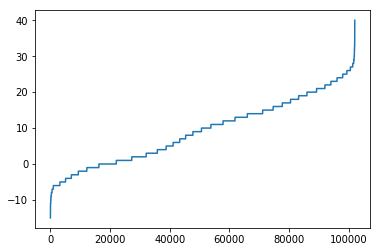

In [94]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sorted(y_train))
plt.show()

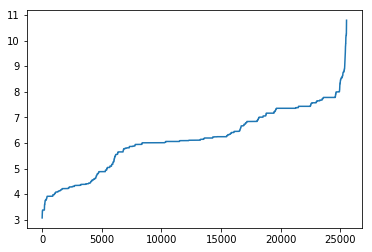

In [95]:
plt.figure()
plt.plot(sorted(y_test_preds))
plt.show()

In [96]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [97]:
X_train2 = X_train2.fillna(-999)
X_test2 = X_test2.fillna(-999)
X_test = X_test.fillna(-999)


In [104]:
X_test[train_numeric_desc.index].head()

,serving_size,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,process_t
Index,,,,,
37320,-999.0,0.0,0.0,0.0,59929899
3913,5.0,0.0,0.0,0.0,0
112180,108.0,3.0,0.0,0.0,1
128820,65.0,3.0,0.0,0.0,0
16037,30.0,0.0,0.0,0.0,0


In [98]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train2,y_train2)

# Make predictions using the testing set

y_train2_preds = regr.predict(X_train2)
y_test2_preds = regr.predict(X_test2)
rmse = np.sqrt(mean_squared_error(y_train2, y_train2_preds))
print("Train RMSE: %f" % (rmse))
rmse = np.sqrt(mean_squared_error(y_test2, y_test2_preds))
print("Test RMSE: %f" % (rmse))
y_test_preds = regr.predict(X_test[train_numeric_desc.index])


Train RMSE: 8.874043
Test RMSE: 8.848563


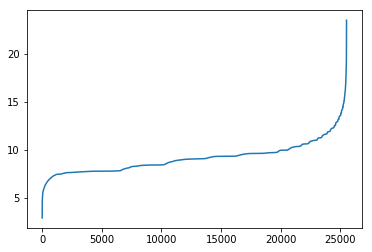

In [99]:
plt.figure()
plt.plot(sorted(y_test_preds))
plt.show()

In [100]:
y_test_submission_example.target = y_test_preds

In [103]:
y_test_submission_example.to_csv('submissions/cris_submission3_9.150338763024159.csv', encoding='utf-8', index=False)



In [101]:
#Importar la funcione de la API
import shutil
shutil.copy("apiquery_pyc.py", "apiquery.pyc")
import apiquery

In [102]:
#Send the submission
apiquery.submit_api(y_test_submission_example,
        competition_name='food',
        subname='barto_submission3', # Pueden cambiar esto sin problemas, poner el nombre que quieran.
        holdout_key='None',
        update_ldb=True,
        username="Insight ML - DD" # Poner el nombre de su equipo como un string. 
                                  # El mejor de los resultados dentro de sus envios es el que aparecera en la tabla de posiciones.
)

requests number 1
200
{'Date': 'Sat, 15 May 2021 03:47:10 GMT', 'Content-Type': 'application/json', 'Content-Length': '516', 'Connection': 'keep-alive', 'X-Request-ID': 'RZ52PAXLF48ESGDN', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'POST', 'Access-Control-Allow-Headers': 'authorization,content-type'}


{'competition_name': 'food',
 'file_path': 'none',
 'message': 'Submission validated.',
 'name': 'Insight ML - DD',
 'result_csv_file': 'barto_submission3',
 'score': 9.150338763024159,
 'score2': None,
 'score3': None,
 'sub_name': 'barto_submission3',
 'sub_uid': '8e60526c-6dbf-404d-9e88-1bbc7a8c8ad7',
 'submission_time': '2021/05/15, 03:47:10'}

requests number 1
200
{'Date': 'Sat, 15 May 2021 03:04:21 GMT', 'Content-Type': 'application/json', 'Content-Length': '512', 'Connection': 'keep-alive', 'X-Request-ID': 'LN025OZ16TGKDUSX', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'POST', 'Access-Control-Allow-Headers': 'authorization,content-type'}
{'competition_name': 'food',
 'file_path': 'none',
 'message': 'Submission validated.',
 'name': 'Insight ML - DD',
 'result_csv_file': 'cris_submission2',
 'score': 9.6933988043528,
 'score2': None,
 'score3': None,
 'sub_name': 'cris_submission2',
 'sub_uid': '142973bc-8f5c-4443-9b35-202ae586ec93',
 'submission_time': '2021/05/15, 03:04:21'}

In [114]:
11.12

11.12

xg_reg3 =     xgb.XGBRegressor(objective = 'reg:squarederror',eval_metric ='rmse' ,
                #colsample_bytree=0.4,
                 #gamma=0,                 
                 
                 #max_depth=3,
                 #min_child_weight=1.5,
                 #n_estimators=100,                                                                    
                 #reg_alpha=0.75,
                 #reg_lambda=0.45,
                 #subsample=0.6,
                               booster = 'gbtree',
                
               learning_rate=0.07,
                 seed=42,
                num_boost_round=3000,
                early_stopping_rounds=50,
                verbose_eval=10)





params = {
    'booster':  'gbtree', #  The default, outperforms gblinear
    'objective': 'reg:squarederror', # 'reg:linear' is deprecated
    'learning_rate': 0.3,
    'n_estimators': 1000, 
    'eval_metric': 'rmse'
}

xgb_reg3 = xgb.XGBRegressor(**params)


xg_reg3.fit(X_train2,y_train2)

y_train2_preds = xg_reg3.predict(X_train2)
y_test2_preds = xg_reg3.predict(X_test2)
rmse = np.sqrt(mean_squared_error(y_train2, y_train2_preds))
print("Train RMSE: %f" % (rmse))
rmse = np.sqrt(mean_squared_error(y_test2, y_test2_preds))
print("Test RMSE: %f" % (rmse))
